In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
import json
metrics = {}
for year in range(1993, 2020 + 1):
    with open(f'metrics/{year}_metrics.json') as json_file:
        metrics[year] = json.load(json_file)

In [3]:
dates = list(range(1993, 2020 + 1))

# Diversity

In [4]:
div_comm = []
comm = []
div_party = []
party = []
for y in metrics.keys():
    div_comm.append(metrics[y]['div_comm'][0])
    comm.append(metrics[y]['div_comm'][1])
    div_party.append(metrics[y]['div_party'][0])
    party.append(metrics[y]['div_party'][1])

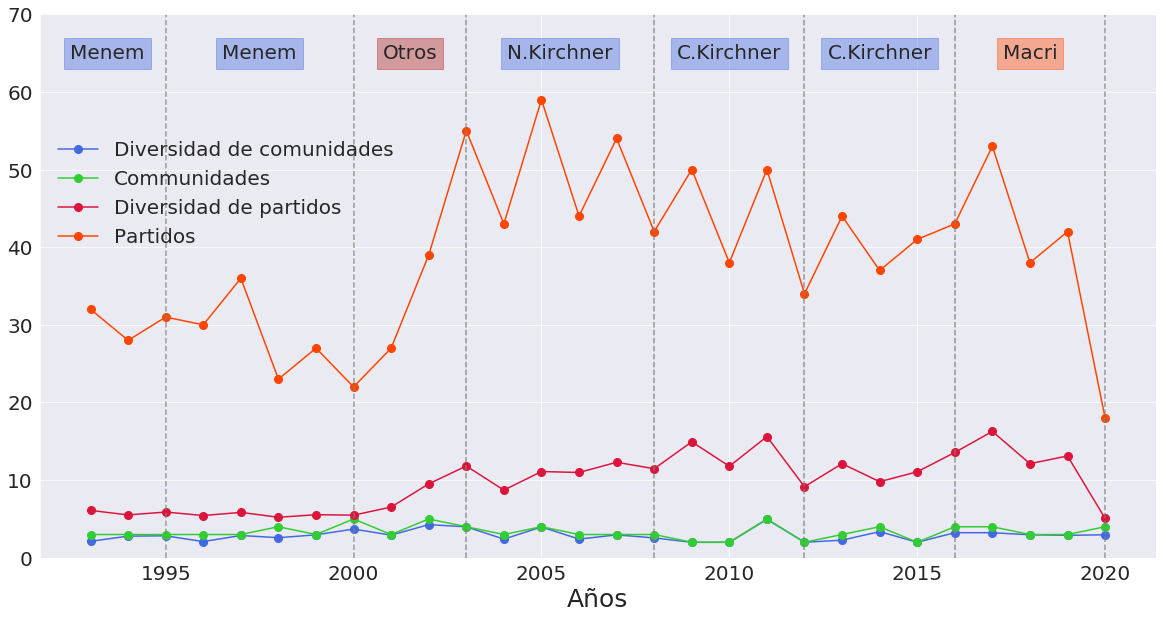

In [381]:
plt.figure(figsize=(20,10))
plt.ylim(0, 70 )
plt.plot(dates, div_comm, label = 'Diversidad de comunidades', color='royalblue', marker='o', markersize=8)
plt.plot(dates, comm, label = 'Communidades', color = 'limegreen', marker = 'o', markersize = 8)
plt.plot(dates, div_party, label = 'Diversidad de partidos', color = 'crimson', marker = 'o', markersize = 8)
plt.plot(dates,party, label = 'Partidos', color = 'orangered', marker = 'o', markersize = 8)
for i,y in enumerate(mandatos_j):
    plt.axvline(y, ls = '--', c='grey', alpha = 0.8)
    if not y == 2020:
        plt.text((mandatos[i + 1] + mandatos[i]) / 2 , 65, f"{presis[i]}", size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec=colores[i],
                           fc= colores[i],
                           alpha = 0.4
                           )
                 )
        
plt.text(1993 + 0.45, 65, 'Menem', size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec= 'royalblue',
                           fc= 'royalblue',
                           alpha = 0.4
                           )
                 )
plt.legend(loc = 2, frameon = False, fontsize = 20, bbox_to_anchor=(0, 0.3, 0.5, 0.5))
plt.tick_params(labelsize = 20)
plt.xlabel('Años', fontsize = 25)
plt.savefig('../figs/metrics/diversity.png')

# Info mutua

In [53]:
info_mutua = []
for y in metrics.keys():
    info_mutua.append(metrics[y]['info_mutua'])

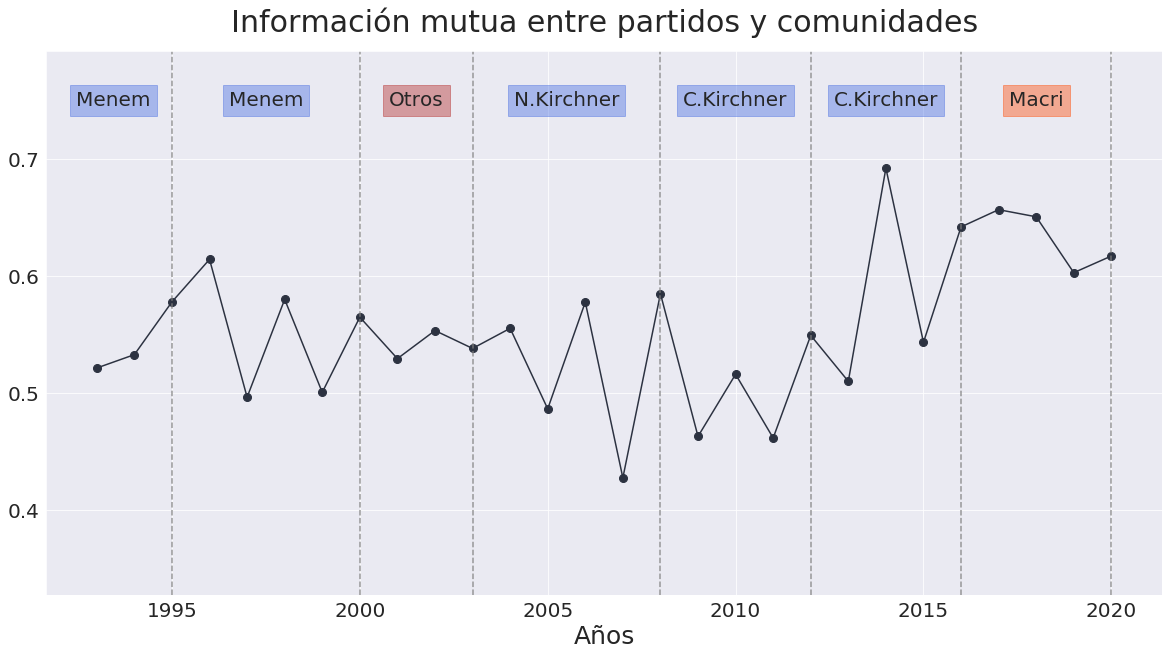

In [365]:
plt.figure(figsize=(20,10))
plt.plot(dates, info_mutua, '-o', c='#2C3241', ms = 8)
plt.ylim(min(info_mutua) - 0.1, max(info_mutua) + 0.1) 
for i,y in enumerate(mandatos_j):
    plt.axvline(y, ls = '--', c='grey', alpha = 0.8)
    if not y == 2020:
        plt.text((mandatos[i + 1] + mandatos[i]) / 2 , 0.75, f"{presis[i]}", size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec=colores[i],
                           fc= colores[i],
                           alpha = 0.4
                           )
                 )
        
plt.text(1993 + 0.45, 0.75, 'Menem', size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec= 'royalblue',
                           fc= 'royalblue',
                           alpha = 0.4
                           )
                 )
plt.tick_params(labelsize = 20)
plt.title('Información mutua entre partidos y comunidades', fontsize = 30, pad = 20)
plt.xlabel('Años', fontsize = 25);
plt.savefig('../figs/metrics/mutual_info.png')

# Path mean

In [72]:
path_mean = []
for y in metrics.keys():
    path_mean.append(metrics[y]['shortest_path_mean'])

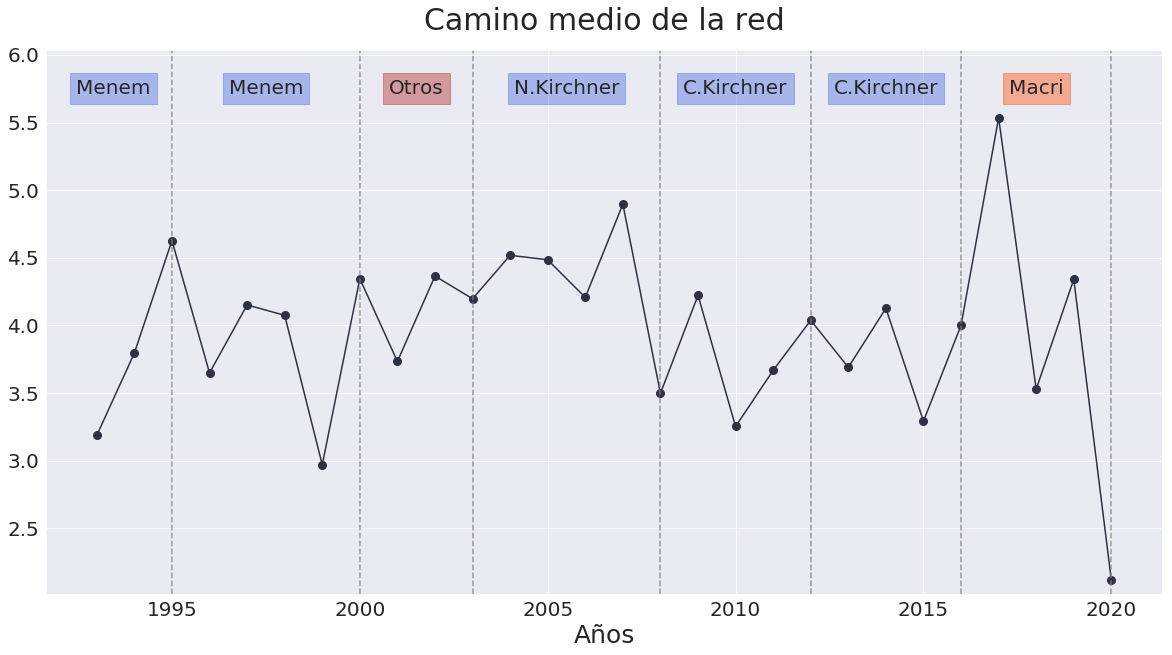

In [368]:
plt.figure(figsize=(20,10))
plt.plot(dates, path_mean, '-o', c='#2C3241', ms = 8)
plt.ylim(min(path_mean) - 0.1, max(path_mean) + 0.5) 
for i,y in enumerate(mandatos_j):
    plt.axvline(y, ls = '--', c='grey', alpha = 0.8)
    if not y == 2020:
        plt.text((mandatos[i + 1] + mandatos[i]) / 2 , 5.75, f"{presis[i]}", size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec=colores[i],
                           fc= colores[i],
                           alpha = 0.4
                           )
                 )
        
plt.text(1993 + 0.45, 5.75, 'Menem', size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec= 'royalblue',
                           fc= 'royalblue',
                           alpha = 0.4
                           )
                 )
plt.tick_params(labelsize = 20)
plt.title('Camino medio de la red', fontsize = 30, pad = 20)
plt.xlabel('Años', fontsize = 25)
plt.savefig('../figs/metrics/path_mean.png')

In [128]:
import numpy as np
print(f'El promedio de todos los años es {np.mean(path_mean)} +- {np.std(path_mean)}')

El promedio de todos los años es 3.9473170537881215 +- 0.6483096937686909


# Shortest paths

In [129]:
all_ideologies

['Justicialismo',
 'Disidente 1',
 'Cambiemos',
 'Liberal',
 'Radicalismo',
 'Peronismo disidente',
 'Socialismo',
 'Disidente 2',
 'PRO']

### Justicialismo

In [241]:
all_ideologies = []

for y in metrics.keys():
    justicialismo_paths = metrics[y]['shortest_paths_ideology'][0]['Justicialismo']
    all_ideologies = list(set(all_ideologies + [ideology for ideology in justicialismo_paths.keys()]))

paths_j = {k: [] for k in all_ideologies}
std_j = {k: [] for k in all_ideologies}

import numpy as np

for y in metrics.keys(): 
    justicialismo_paths = metrics[y]['shortest_paths_ideology'][0]['Justicialismo']
    for ideology in all_ideologies:
        if ideology in list(justicialismo_paths.keys()):
            paths_j[ideology].append(justicialismo_paths[ideology][0])
            std_j[ideology].append(justicialismo_paths[ideology][1])
        else:
            paths_j[ideology].append(np.nan)
            std_j[ideology].append(np.nan)
            


In [319]:
colores = ['royalblue','olive','orangered','grey','firebrick','mediumseagreen','grey','grey','gold']
dict_colores = {k: colores[i] for i,k in enumerate(all_ideologies)}
mandatos_j = [1995, 2000, 2003, 2008, 2012, 2016, 2020]
presis = ['Menem', 'Otros', 'N.Kirchner', 'C.Kirchner', 'C.Kirchner', 'Macri', 'A. Fernandez' ]
colores = ['royalblue', 'firebrick', 'royalblue', 'royalblue', 'royalblue', 'orangered' ]

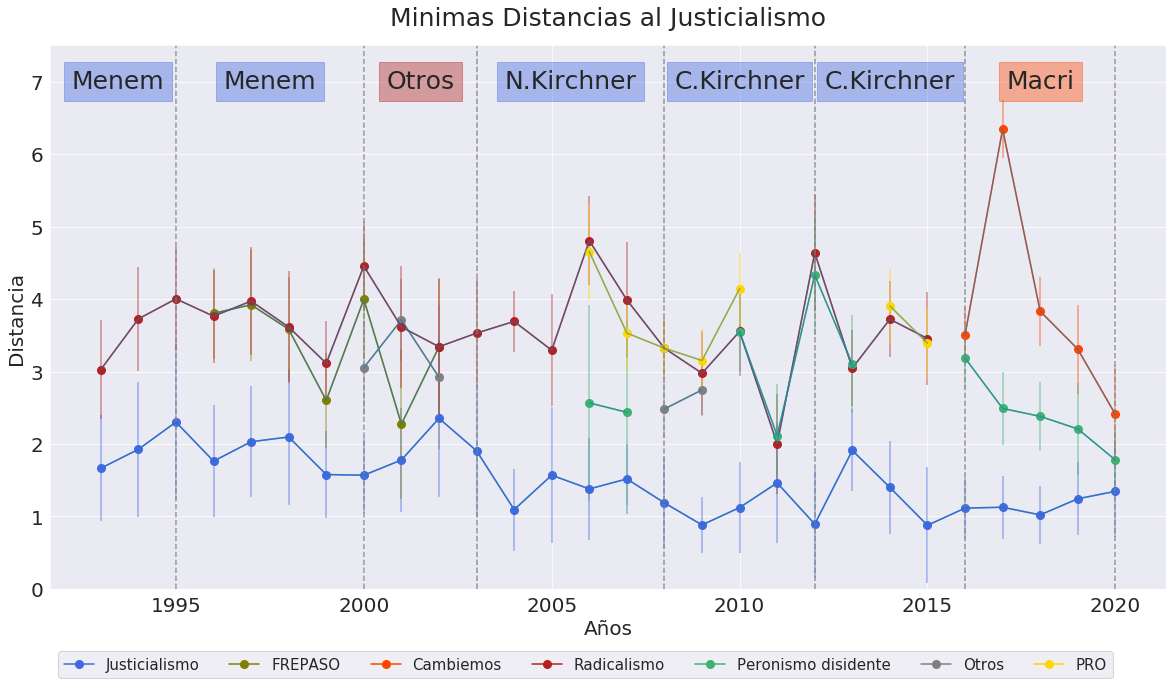

In [370]:
import funciones as f


plt.figure(figsize=(20,10))
plt.ylim(0, 7.5) 
for i,ideology in enumerate(all_ideologies):
    if ideology == 'Disidente 1':
        label = 'FREPASO'
        plt.plot(list(metrics.keys()),paths_j[ideology],'-o',color=dict_colores[ideology], label= f'{label}', ms = 8 )  
        plt.errorbar(list(metrics.keys()),paths_j[ideology], yerr = std_j[ideology], alpha = 0.5, ecolor=dict_colores[ideology])
        continue
    if ideology == 'Socialismo':
        plt.plot(list(metrics.keys()),paths_j[ideology],'-o',color=dict_colores[ideology], label= 'Otros', ms = 8 ) 
        plt.errorbar(list(metrics.keys()),paths_j[ideology], yerr = std_j[ideology], alpha = 0.5, ecolor=dict_colores[ideology])
        continue
    if ideology == 'Liberal':
        plt.plot(list(metrics.keys()),paths_j[ideology],'-o',color=dict_colores[ideology], ms = 8 ) 
        plt.errorbar(list(metrics.keys()),paths_j[ideology], yerr = std_j[ideology], alpha = 0.5, ecolor=dict_colores[ideology])
        continue 
    if ideology == 'Disidente 2':
        plt.plot(list(metrics.keys()),paths_j[ideology],'-o',color=dict_colores[ideology], ms = 8 ) 
        plt.errorbar(list(metrics.keys()),paths_j[ideology], yerr = std_j[ideology], alpha = 0.5, ecolor=dict_colores[ideology])
        continue
    else: 
        plt.plot(list(metrics.keys()),paths_j[ideology],'-o',color=dict_colores[ideology], label= f'{ideology}', ms = 8 )  
        plt.errorbar(list(metrics.keys()),paths_j[ideology], yerr = std_j[ideology], alpha = 0.5, ecolor=dict_colores[ideology])


for i,y in enumerate(mandatos_j):
    plt.axvline(y, ls = '--', c='grey', alpha = 0.8)
    if not y == 2020:
        plt.text((mandatos[i + 1] + mandatos[i]) / 2 , 7, f"{presis[i]}", size=25,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec=colores[i],
                           fc= colores[i],
                           alpha = 0.4
                           )
                 )
        
plt.text(1993 + 0.45, 7, 'Menem', size=25,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec= 'royalblue',
                           fc= 'royalblue',
                           alpha = 0.4
                           )
                 )
plt.title('Minimas Distancias al Justicialismo', fontsize = 25, pad = 20 ) 
plt.ylabel('Distancia', fontsize = 20 )
plt.xlabel('Años', fontsize = 20)
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.1),
          fancybox=True, ncol = 7, fontsize = 15)
plt.savefig('../figs/metrics/dist_justicialismo.png')

### Radicalismo

In [212]:
all_ideologies2

['Justicialismo',
 'Disidente 1',
 'Liberal',
 'Radicalismo',
 'Peronismo disidente',
 'Socialismo',
 'Disidente 2',
 'PRO']

In [228]:
all_ideologies2 = []
#hago anios a mano porque el radicalismo existe hasta el 2015
for y in range(1993,2016):
    radicalismo_paths = metrics[y]['shortest_paths_ideology'][0]['Radicalismo']
    all_ideologies2 = list(set(all_ideologies2 + [ideology for ideology in radicalismo_paths.keys()]))

paths_r = {k: [] for k in all_ideologies2}
std_r = {k: [] for k in all_ideologies2}

for y in range(1993,2016): 
    radicalismo_paths = metrics[y]['shortest_paths_ideology'][0]['Radicalismo']
    for ideology in all_ideologies2:
        if ideology in list(radicalismo_paths.keys()):
            paths_r[ideology].append(radicalismo_paths[ideology][0])
            std_r[ideology].append(radicalismo_paths[ideology][1])
        else:
            paths_r[ideology].append(np.nan)
            std_r[ideology].append(np.nan)


In [335]:
mandatos_r = [1995, 2000, 2003, 2008, 2012, 2016]
presis_r = ['Menem', 'Otros', 'N.Kirchner', 'C.Kirchner', 'C.Kirchner', 'Macri']
colores_r = ['royalblue', 'firebrick', 'royalblue', 'royalblue', 'royalblue' ]

In [336]:
colores2 = ['royalblue','olive','grey','firebrick','mediumseagreen','grey', 'grey','gold']
dict_colores2 = {k: colores2[i] for i,k in enumerate(all_ideologies2)}

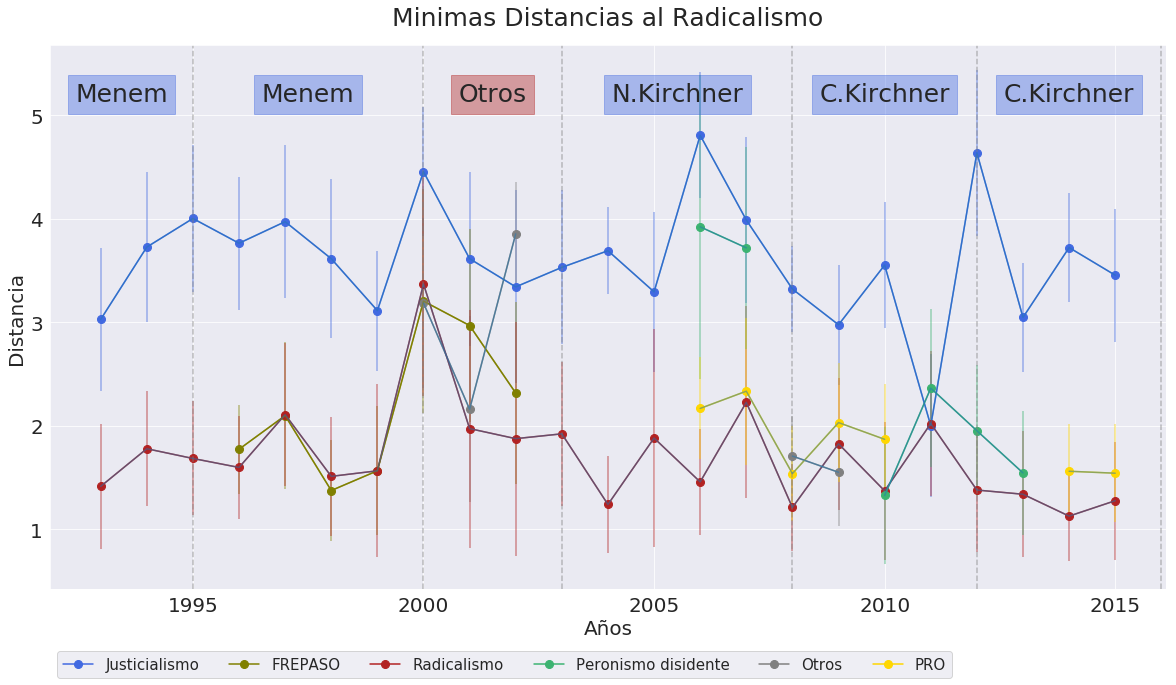

In [341]:
plt.figure(figsize=(20,10))
for i,ideology in enumerate(all_ideologies2):
    if ideology == 'Disidente 1':
        label = 'FREPASO'
        plt.plot(list(range(1993,2016)),paths_r[ideology],'-o',color=dict_colores2[ideology], label= f'{label}', ms = 8)  
        plt.errorbar(list(range(1993,2016)),paths_r[ideology], yerr = std_r[ideology], alpha = 0.5, color=dict_colores2[ideology])
        continue
    if ideology == 'Socialismo':
        plt.plot(list(range(1993,2016)),paths_r[ideology],'-o',color=dict_colores2[ideology], label= 'Otros', ms = 8)  
        plt.errorbar(list(range(1993,2016)),paths_r[ideology], yerr = std_r[ideology], alpha = 0.5, ecolor=dict_colores2[ideology])
        continue
    if ideology == 'Liberal':
        plt.plot(list(range(1993,2016)),paths_r[ideology],'-o',color=dict_colores2[ideology], ms = 8)  
        plt.errorbar(list(range(1993,2016)),paths_r[ideology], yerr = std_r[ideology], alpha = 0.5, ecolor=dict_colores2[ideology])
        continue
    if ideology == 'Disidente 2':
        plt.plot(list(range(1993,2016)),paths_r[ideology],'-o',color=dict_colores2[ideology], ms = 8)  
        plt.errorbar(list(range(1993,2016)),paths_r[ideology], yerr = std_r[ideology], alpha = 0.5, ecolor=dict_colores2[ideology])
        continue
    else: 
        plt.plot(list(range(1993,2016)),paths_r[ideology],'-o',color=dict_colores2[ideology], label= f'{ideology}', ms = 8 )  
        plt.errorbar(list(range(1993,2016)),paths_r[ideology], yerr = std_r[ideology], alpha = 0.5, ecolor=dict_colores2[ideology])

for i,y in enumerate(mandatos_r):
    plt.axvline(y, ls = '--', c='grey', alpha = 0.5)
    
    if not y == 2016:
        plt.text((mandatos_r[i + 1] + mandatos_r[i]) / 2 , 5.2, f"{presis_r[i]}", size=25,
                     ha="center", va="center",
                     bbox=dict(boxstyle="square",
                               ec=colores_r[i],
                               fc= colores_r[i],
                               alpha = 0.4
                               )
                     )
        
plt.text(1993 + 0.45, 5.2, 'Menem', size=25,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec= 'royalblue',
                           fc= 'royalblue',
                           alpha = 0.4
                           )
                 )
        
plt.title('Minimas Distancias al Radicalismo', fontsize = 25, pad = 20) 
plt.ylabel('Distancia', fontsize = 20)
plt.xlabel('Años', fontsize = 20)
plt.ylabel('Distancia', fontsize = 20 )
plt.xlabel('Años', fontsize = 20)
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.1),
          fancybox=True, ncol = 7, fontsize = 15)
plt.savefig('../figs/metrics/dist_radicalismo.png')

# Modularity

In [157]:
modularity_party = []
modularity_comm = []
for y in metrics.keys():
    modularity_comm.append(metrics[y]['modularity_community'])
    modularity_party.append(metrics[y]['modularity_party'])

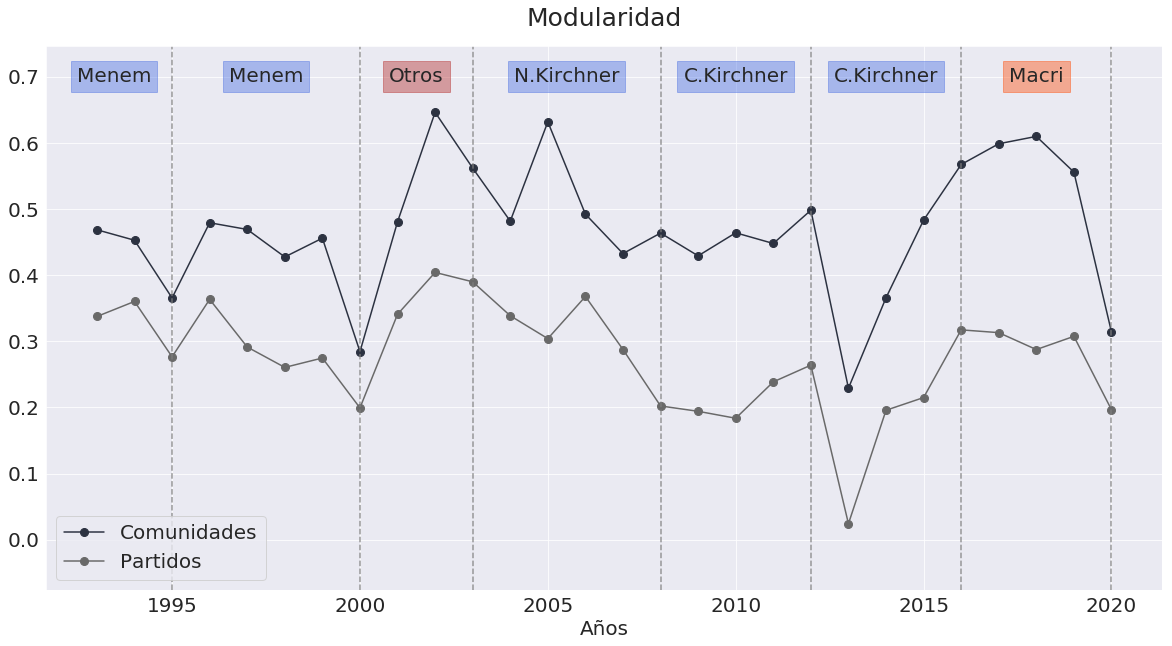

In [372]:
plt.figure(figsize=(20,10))
plt.plot(dates, modularity_comm, '-o', label = 'Comunidades', ms = 8, c='#2C3241')
plt.plot(dates, modularity_party, '-o', label = 'Partidos', ms = 8, c= 'dimgrey')
plt.ylim(min(modularity_party) - 0.1, max(modularity_comm) + 0.1) 
for i,y in enumerate(mandatos_j):
    plt.axvline(y, ls = '--', c='grey', alpha = 0.8)
    if not y == 2020:
        plt.text((mandatos[i + 1] + mandatos[i]) / 2 , 0.7, f"{presis[i]}", size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec=colores[i],
                           fc= colores[i],
                           alpha = 0.4
                           )
                 )
        
plt.text(1993 + 0.45, 0.7, 'Menem', size=20,
                 ha="center", va="center",
                 bbox=dict(boxstyle="square",
                           ec= 'royalblue',
                           fc= 'royalblue',
                           alpha = 0.4
                           )
                 )

plt.tick_params(labelsize = 20)
plt.title('Modularidad', fontsize = 25, pad = 20)
plt.xlabel('Años', fontsize = 20)
plt.legend(loc = 3, fontsize = 20)
plt.savefig('../figs/metrics/modularity.png')